##設定類

In [ ]:
#モジュールインポート
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
#使用デバイス判別
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("使用デバイス:", device)

使用デバイス: cuda


In [ ]:
def fix_seed(seed):
    # random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

SEED = 42
fix_seed(SEED)

##データ読み込み

In [ ]:
#研究室データセットの前処理

my_ip =  "192.168.100.7"
#データ読み込み
youtube_data = pd.read_csv("drive/MyDrive/lab/app_dataset/csv_data/youtube2.csv")
edit_data = pd.read_csv("drive/MyDrive/lab/app_dataset/csv_data/edit.csv")
ping_data = pd.read_csv("drive/MyDrive/lab/app_dataset/csv_data/ping.csv")
video_data = pd.read_csv("drive/MyDrive/lab/app_dataset/csv_data/video1.csv")
mail_data = pd.read_csv("drive/MyDrive/lab/app_dataset/csv_data/mail1.csv")

# youtube_data = youtube_data.head(50000)
# edit_data = edit_data.head(50000)
# ping_data = ping_data.head(50000)
# video_data = video_data.head(50000)
# mail_data = mail_data.head(50000)

youtube_data[["link"]] = 0
edit_data[["link"]] = 0
ping_data[["link"]] = 0
video_data[["link"]] = 0
mail_data[["link"]] = 0

datas = {1:youtube_data, 2:edit_data, 3:ping_data, 4:video_data, 5:mail_data}
ips = ["192.168.100.8","192.168.100.14","192.168.100.10","192.168.100.12"]

for index, df in datas.items():
  for index, data in df.iterrows():
    if data["Source"] == my_ip:
      df.loc[index, "link"] = 0
    elif data["Destination"] == my_ip:
      df.loc[index, "link"] = 1
    else: df.loc[index, "link"]  = 2

  print(index)
  df['rate'] = df['Length'] / (df['interval'] + 0.0000000000001)
  df = df[["Length","interval","rate","link"]]


In [ ]:
#ISCXデータセットの前処理
"""
my_ip = "131.202.240.150"

audio_data = pd.read_csv("drive/MyDrive/lab/my_dataset/csvs_large/audio.csv")
file_data = pd.read_csv("drive/MyDrive/lab/my_dataset/csvs_large/file.csv")
spotify_data = pd.read_csv("drive/MyDrive/lab/my_dataset/csvs_large/spotify.csv")
video_data = pd.read_csv("drive/MyDrive/lab/my_dataset/csvs_large/video.csv")
vimeo_data = pd.read_csv("drive/MyDrive/lab/my_dataset/csvs_large/vimeo.csv")
voip_data = pd.read_csv("drive/MyDrive/lab/my_dataset/csvs_large/voip.csv")
youtube_data = pd.read_csv("drive/MyDrive/lab/my_dataset/csvs_large/youtube.csv")
netflix_data = pd.read_csv("drive/MyDrive/lab/my_dataset/csvs_large/netflix.csv")

audio_data = audio_data.head(100000)
file_data = file_data.head(100000)
video_data = video_data.head(100000)
voip_data = voip_data.head(100000)
streaming_data = youtube_data.head(100000)


audio_data[["link"]] = 0
file_data[["link"]] = 0
spotify_data[["link"]] = 0
video_data[["link"]] = 0
vimeo_data[["link"]] = 0
voip_data[["link"]] = 0
youtube_data[["link"]] = 0
netflix_data[["link"]] = 0

datas = {1:streaming_data, 2:audio_data, 3:voip_data, 4:video_data, 5:file_data}

for index, df in datas.items():
  for index, data in df.iterrows():
    if data["Source"] == my_ip:
      df.loc[index, "link"] = 0
    elif data["Destination"] == my_ip:
      df.loc[index, "link"] = 2
    else: df.loc[index, "link"]  = 1

  print(index)
  df['rate'] = df['Length'] / (df['interval'] + 0.0000000000001)
  df = df[["Length","interval","rate","link"]]
"""

In [ ]:
#研究室データセットの前処理
my_ip =  "192.168.100.7"
my_ip2 = "131.202.240.150"
#データ読み込み
youtube_data = pd.read_csv("drive/MyDrive/lab/app_dataset/new_data/streaming.csv")
edit_data = pd.read_csv("drive/MyDrive/lab/app_dataset/new_data/edit.csv")
ping_data = pd.read_csv("drive/MyDrive/lab/app_dataset/new_data/ping.csv")
video_data = pd.read_csv("drive/MyDrive/lab/app_dataset/new_data/video.csv")
mail_data = pd.read_csv("drive/MyDrive/lab/app_dataset/new_data/mail.csv")

youtube_data[["link"]] = 0
edit_data[["link"]] = 0
ping_data[["link"]] = 0
video_data[["link"]] = 0
mail_data[["link"]] = 0

datas = {1:youtube_data, 2:edit_data, 3:ping_data, 4:video_data, 5:mail_data}
ips = ["192.168.100.7","192.168.100.7","192.168.100.12","192.168.100.7","192.168.100.7"]

for n, df in datas.items():
  for index, data in df.iterrows():
    if data["Source"]  == ips[n-1]:
      df.loc[index, "link"] = 0
    elif data["Destination"] == ips[n-1]:
      df.loc[index, "link"] = 1
    else: datas[n].drop(index, inplace=True)

  print(index)
  df['rate'] = df['Length'] / (df['interval'] + 0.0000000000001)
  df = df[["Length","interval","rate","link"]]


137478
47813
34814
155144
27486


In [ ]:
datas[3]

In [ ]:
##データ正規化
#モジュールインポート
from sklearn.preprocessing import MinMaxScaler

labels = np.empty(0)
trains = np.empty(0)
data_num = 0
s=1
sequence = 10*s

for index in datas:
  data = datas[index]
  data = data[["Length","interval","rate","link"]].to_numpy()

  #データ正規化インスタンス生成
  std = MinMaxScaler()
  X = data
  X = std.fit_transform(X)
  data= X

  label_index = index
  num = len(datas[index])/sequence
  num = int(np.floor(num))
  data_num += num
  print("データ{}の要素数は{}です".format(label_index,num))

  label = np.full(num,label_index-1)
  labels = np.append(labels, label)
  trains = np.append(trains,data)

#trains = np.resize(trains, (data_num,sequence,4))
trains = np.resize(trains, (data_num,1,sequence,4))

データ1の要素数は13255です
データ2の要素数は4307です
データ3の要素数は3481です
データ4の要素数は15269です
データ5の要素数は2260です


In [ ]:
target =labels

In [ ]:
data_ = trains

In [ ]:
from sklearn.model_selection import train_test_split
#データセットをトレーニングデータと検証データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(data_, target, test_size = 0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

In [ ]:
# Tensor型に変換
# 学習に入れるときはfloat型になっている必要があるのここで変換してしまう
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_valid = torch.from_numpy(X_valid).float()
y_valid = torch.from_numpy(y_valid).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

In [ ]:
# 2. Datasetの作成
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)

# 3. DataLoaderの作成
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 辞書型変数にまとめる
dataloaders_dict = {"train": train_dataloader, "val": valid_dataloader, "test": test_dataloader}

In [ ]:
print(data_.shape)

(2044, 1, 90, 4)


##モデル定義

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, stride=2)
        #conv2d(input_cunnel,output_cunnel,karnel,padding)
        self.conv1 = nn.Conv2d(1,16,2,padding= 1)
        self.conv2 = nn.Conv2d(16,32,2,padding= 1)

        self.fc1 = nn.Linear(576, 120)
        self.fc2 = nn.Linear(120, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        #x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        #x = x.view(x.size()[0], -1)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
class RNN(nn.Module):

    def __init__(self):
        super(RNN, self).__init__()
        self.seq_len = sequence       # 時系列のSequenceとしてLSTMに入力する
        self.feature_size = 4         # 特徴量の次元としてLSTMに入力する
        self.hidden_layer_size = 32   # 隠れ層のサイズ
        self.layers = 2          # LSTMのレイヤー数(LSTMを何層重ねるか)
        self.rnn = nn.RNN(self.feature_size,
                            self.hidden_layer_size,
                            num_layers = self.layers)

        self.fc = nn.Linear(self.hidden_layer_size, 5)

    def init_hidden(self, batch_size): # LSTMの隠れ層 hidden を初期化
        hedden = torch.zeros(self.layers, batch_size, self.hidden_layer_size)
        return hedden

    def forward(self, x):
        batch_size = x.shape[0]
        self.hidden = self.init_hidden(batch_size)

        x = x.view(batch_size, self.seq_len, self.feature_size)  # (Batch, Cannel, Height, Width) -> (Batch, Height, Width) = (Batch, Seqence, Feature)
                                                                 # 画像の Height を時系列のSequenceに、Width を特徴量の次元としてLSTMに入力する
        x = x.permute(1, 0, 2)                                   # (Batch, Seqence, Feature) -> (Seqence , Batch, Feature)

        rnn_out, h_n = self.rnn(x, self.hidden)    # LSTMの入力データのShapeは(Seqence, Batch, Feature)
                                                                 # (h_n) のShapeは (num_layers, batch, hidden_size)
        x = h_n[-1,:,:]                                          # lstm_layersの最後のレイヤーを取り出す  (B, h)
        x = self.fc(x)

        return x

In [ ]:
class GRU(nn.Module):

    def __init__(self):
        super(GRU, self).__init__()
        self.seq_len = sequence            # 時系列のSequenceとしてGRUに入力する
        self.feature_size = 4         # Width を特徴量の次元としてGRUに入力する
        self.hidden_layer_size = 32   # 隠れ層のサイズ
        self.gru_layers = 2          # GRUのレイヤー数(GRUを何層重ねるか)
        self.gru = nn.GRU(self.feature_size,
                            self.hidden_layer_size,
                            num_layers = self.gru_layers)

        self.fc = nn.Linear(self.hidden_layer_size, 5)

    def init_hidden(self, batch_size): # LSTMの隠れ層 hidden と記憶セル cell を初期化
        hedden = torch.zeros(self.gru_layers, batch_size, self.hidden_layer_size)
        return hedden

    def forward(self, x):
        batch_size = x.shape[0]
        self.hidden = self.init_hidden(batch_size)

        x = x.view(batch_size, self.seq_len, self.feature_size)  # (Batch, Cannel, Height, Width) -> (Batch, Height, Width) = (Batch, Seqence, Feature)
                                                                 # 画像の Height を時系列のSequenceに、Width を特徴量の次元としてLSTMに入力する
        x = x.permute(1, 0, 2)                                   # (Batch, Seqence, Feature) -> (Seqence , Batch, Feature)

        gru_out, h_n= self.gru(x, self.hidden)    # LSTMの入力データのShapeは(Seqence, Batch, Feature)
                                                                 # (h_n) のShapeは (num_layers, batch, hidden_size)
        x = h_n[-1,:,:]                                          # lstm_layersの最後のレイヤーを取り出す  (B, h)
        x = self.fc(x)

        return x

In [ ]:
class LSTM(nn.Module):

    def __init__(self):
        super(LSTM, self).__init__()
        self.seq_len = sequence            # 画像の Height を時系列のSequenceとしてLSTMに入力する
        self.feature_size = 4         # 画像の Width を特徴量の次元としてLSTMに入力する
        self.hidden_layer_size = 32   # 隠れ層のサイズ
        self.lstm_layers = 2          # LSTMのレイヤー数(LSTMを何層重ねるか)
        self.lstm = nn.LSTM(self.feature_size,
                            self.hidden_layer_size,
                            num_layers = self.lstm_layers)

        self.fc = nn.Linear(self.hidden_layer_size, 5)

    def init_hidden_cell(self, batch_size): # LSTMの隠れ層 hidden と記憶セル cell を初期化
        hedden = torch.zeros(self.lstm_layers, batch_size, self.hidden_layer_size)
        cell = torch.zeros(self.lstm_layers, batch_size, self.hidden_layer_size)
        return (hedden, cell)

    def forward(self, x):
        batch_size = x.shape[0]
        self.hidden_cell = self.init_hidden_cell(batch_size)

        x = x.view(batch_size, self.seq_len, self.feature_size)  # (Batch, Cannel, Height, Width) -> (Batch, Height, Width) = (Batch, Seqence, Feature)
                                                                 # 画像の Height を時系列のSequenceに、Width を特徴量の次元としてLSTMに入力する
        x = x.permute(1, 0, 2)                                   # (Batch, Seqence, Feature) -> (Seqence , Batch, Feature)

        lstm_out, (h_n, c_n) = self.lstm(x, self.hidden_cell)    # LSTMの入力データのShapeは(Seqence, Batch, Feature)
                                                                 # (h_n) のShapeは (num_layers, batch, hidden_size)
        x = h_n[-1,:,:]                                          # lstm_layersの最後のレイヤーを取り出す  (B, h)
        x = self.fc(x)

        return x

In [ ]:
net = CNN()
print(net)

CNN(
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=5, bias=True)
)


In [ ]:
#損失関数の定義
criterion = nn.CrossEntropyLoss()

#最適化手法の定義
optimizer = optim.Adam(net.parameters(), lr=0.001)
#optimizer = optim.RMSprop(net0.parameters(), lr=0.001)

##学習

In [ ]:
def train_model(net, dataloaders_dict, criterion, optimizer, device, num_epochs):

  train_loss_history = np.empty(0)
  train_acc_history = np.empty(0)
  val_loss_history = np.empty(0)
  val_acc_history = np.empty(0)
  preds_history = np.empty(0)

  for epoch in range(num_epochs):
      print("\n")
      print('Epoch {}/{}'.format(epoch+1, num_epochs))
      print('-------------')

  #epochごとの学習と検証のループ
      for phase in ['train', 'val']:
          if phase == 'train':   # モデルを訓練モードに設定
              net.train()
          else:                  # モデルを推論モードに設定
              net.eval()

          epoch_loss = 0.0       # エポックの損失和
          epoch_corrects = 0     # エポックの正解数

          # DataLoaderからデータをバッチごとに取り出す
          for inputs, labels in dataloaders_dict[phase]:

              optimizer.zero_grad()  # optimizerの初期化

              # 順伝播計算
              # 学習時のみ勾配を計算させる設定にする
              with torch.set_grad_enabled(phase == 'train'):
                  outputs = net(inputs)                 # 順伝播
                  loss = criterion(outputs, labels)     # 損失を計算
                  _, preds = torch.max(outputs, 1)      # ラベルを予測

                  # 訓練時はバックプロパゲーション
                  if phase == 'train':
                      loss.backward()                   # 逆伝搬の計算
                      optimizer.step()                  # パラメータの更新

                  # イテレーション結果の計算
                  # lossの合計を更新
                  epoch_loss += loss.item() * inputs.size(0)
                  # 正解数の合計を更新
                  epoch_corrects += torch.sum(preds == labels.data)
                  preds_history = np.append(preds_history, preds)

          # epochごとのlossと正解率を表示
          epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
          epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

          if phase == 'train':
            train_loss_history = np.append(train_loss_history, epoch_loss)
            train_acc_history = np.append(train_acc_history, epoch_acc)

          if phase == 'val':
            val_loss_history = np.append(train_loss_history, epoch_loss)
            val_acc_history = np.append(val_acc_history, epoch_acc)


          print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

  fig = plt.figure()
  axis1 = fig.subplots()
  #axis2 = axis1.twinx()
  x = np.arange(num_epochs)

  line1 = axis1.plot(x, train_acc_history, color='C0',label='train_acc')
  line2 = axis1.plot(x, val_acc_history, color='C1', label='val_acc')

  h1, l1 = axis1.get_legend_handles_labels()
  #h2, l2 = axis2.get_legend_handles_labels()
  axis1.legend(h1, l1, loc='lower right')
  #axis1.legend(h1+h2, l1+l2, loc='lower right')

  axis1.set_xlabel("epochs")
  axis1.set_ylabel("accuracy")
  axis1.grid(False)
  #axis2.set_ylabel("accuracy")
  plt.show()
  print(preds_history)



Epoch 1/100
-------------
train Loss: 0.9747 Acc: 0.6527
val Loss: 0.8057 Acc: 0.7179


Epoch 2/100
-------------
train Loss: 0.6236 Acc: 0.7810
val Loss: 0.4739 Acc: 0.8349


Epoch 3/100
-------------
train Loss: 0.4346 Acc: 0.8412
val Loss: 0.3942 Acc: 0.8539


Epoch 4/100
-------------
train Loss: 0.3747 Acc: 0.8617
val Loss: 0.3650 Acc: 0.8647


Epoch 5/100
-------------
train Loss: 0.3419 Acc: 0.8753
val Loss: 0.3435 Acc: 0.8762


Epoch 6/100
-------------
train Loss: 0.3216 Acc: 0.8817
val Loss: 0.3208 Acc: 0.8811


Epoch 7/100
-------------
train Loss: 0.3039 Acc: 0.8874
val Loss: 0.3118 Acc: 0.8853


Epoch 8/100
-------------
train Loss: 0.2897 Acc: 0.8926
val Loss: 0.3148 Acc: 0.8820


Epoch 9/100
-------------
train Loss: 0.2790 Acc: 0.8966
val Loss: 0.3024 Acc: 0.8897


Epoch 10/100
-------------
train Loss: 0.2699 Acc: 0.8994
val Loss: 0.2924 Acc: 0.8919


Epoch 11/100
-------------
train Loss: 0.2601 Acc: 0.9036
val Loss: 0.2931 Acc: 0.8937


Epoch 12/100
-------------
t

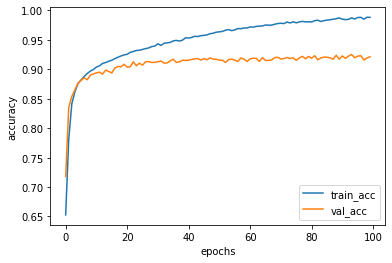

[1. 1. 1. ... 0. 3. 2.]
学習時間：566.6505670547485


In [ ]:
import time

# 処理前の時刻
t1 = time.time()

num_epochs = 100
train_model(net, dataloaders_dict, criterion, optimizer, device, num_epochs=num_epochs)

# 処理後の時刻
t2 = time.time()

# 経過時間を表示
elapsed_time = t2-t1
print(f"学習時間：{elapsed_time}")

0.9250810110174984
推論時間：0.3374302387237549
              precision    recall  f1-score   support

           0     0.9522    0.9568    0.9545      2707
           1     0.8454    0.7962    0.8201       893
           2     0.8915    0.9236    0.9073       694
           3     0.9838    0.9841    0.9840      2964
           4     0.5915    0.6083    0.5998       457

    accuracy                         0.9251      7715
   macro avg     0.8529    0.8538    0.8531      7715
weighted avg     0.9252    0.9251    0.9250      7715



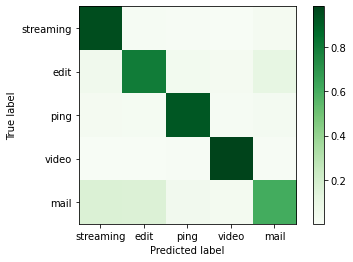

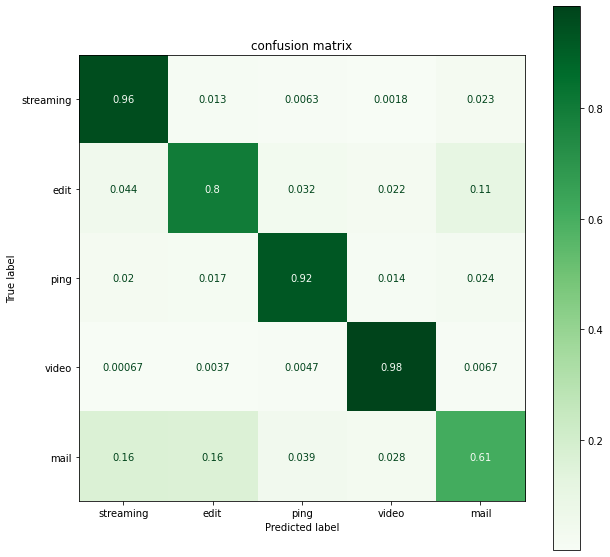

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
inputs = X_test
true = y_test

labels = ["streaming", "edit", "ping", "video", "mail"]
#labels = ["streaming", "audio", "voip", "video", "file"]
net.eval() #推論モード


with torch.set_grad_enabled(False):   # 推論モードでは勾配を算出しない
    # 処理前の時刻
    t1 = time.time()
    # 出力
    outputs = net(inputs)     # 順伝播
    _, preds = torch.max(outputs, 1)  # ラベルを予測

    correct = 0
    for i in range(len(preds)):
      if preds[i] == true[i]:
        correct += 1

    print(correct / len(preds))
    # 処理後の時刻
    t2 = time.time()
    # 経過時間を表示
    elapsed_time = t2-t1
    print(f"推論時間：{elapsed_time}")

    print(classification_report(preds, true,  digits=4))

    disp = ConfusionMatrixDisplay.from_predictions(preds, true, display_labels = labels,include_values = False ,normalize = "true", cmap = 'Greens')
    fig, ax = plt.subplots(figsize = (10,10))
    plt.title('confusion matrix')
    disp.plot(ax=ax, cmap="Greens")



##ランダムフォレスト

torch.Size([12033, 10, 4])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


学習時間：2.9943056106567383
学習時間：0.07320761680603027
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1002
           1     0.9898    0.9990    0.9944       973
           2     0.9961    1.0000    0.9981       256
           3     0.9970    0.9990    0.9980      1013
           4     0.9960    0.9729    0.9843       517

    accuracy                         0.9957      3761
   macro avg     0.9958    0.9942    0.9950      3761
weighted avg     0.9958    0.9957    0.9957      3761



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


rf score is 0.9957458122839671


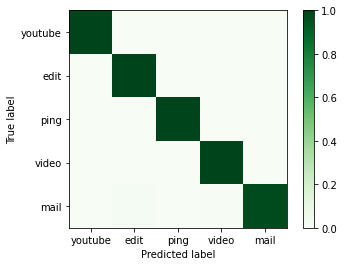

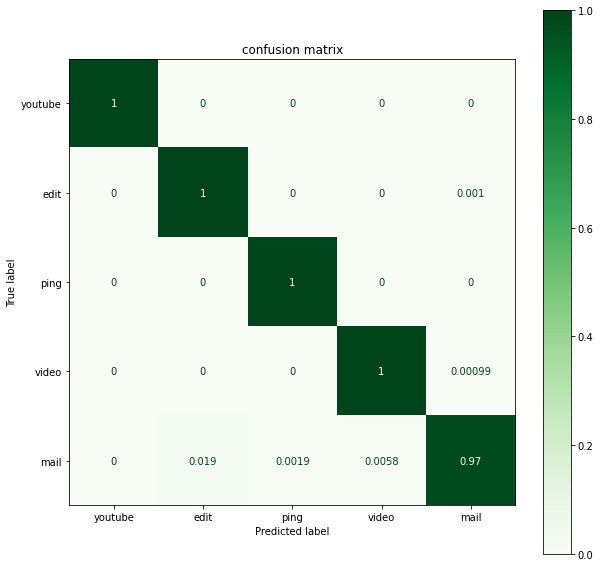

In [ ]:
#ランダムフォレストモデル生成
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train = X_train.squeeze()
X_test = X_test.squeeze()

print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# 処理前の時刻
t1 = time.time()

#LogisticRegression
model_rf = RFC(verbose=True)
model_rf.fit(X_train, y_train)

# 処理後の時刻
t2 = time.time()
# 経過時間を表示
elapsed_time = t2-t1
print(f"学習時間：{elapsed_time}")

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# 処理前の時刻
t1 = time.time()
#分類
y_pred = model_rf.predict(X_test)
# 処理後の時刻
t2 = time.time()
# 経過時間を表示
elapsed_time = t2-t1
print(f"学習時間：{elapsed_time}")

print(classification_report(y_pred, y_test, digits=4))

labels = ["youtube", "edit", "ping", "video", "mail"]
disp = ConfusionMatrixDisplay.from_predictions(y_pred,y_test, display_labels = labels,include_values = False ,normalize = "true", cmap = 'Greens')
fig, ax = plt.subplots(figsize = (10,10))
plt.title('confusion matrix')
disp.plot(ax=ax, cmap="Greens")

score_rf = model_rf.score(X_test, y_test)
print('rf score is', score_rf)


In [ ]:
for i in range(10):
  print("データ=>{}, ラベル=>{}".format(X_train[i],y_train[i]))

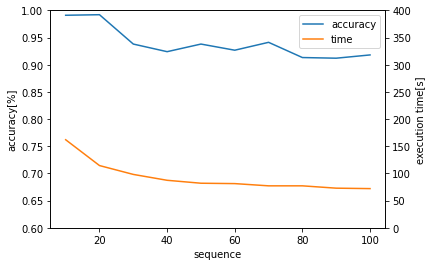

In [ ]:
acc = [0.991, 0.992, 0.938, 0.924, 0.938, 0.9267, 0.9412, 0.9132, 0.912, 0.918]
time = [162, 114.5, 98.2, 87.4, 82, 81.3, 77.2, 77.2, 72.9, 72.1]

fig = plt.figure()
axis1 = fig.subplots()
axis2 = axis1.twinx()
x =[10,20,30,40,50,60,70,80,90,100]

line1 = axis1.plot(x, acc, color='C0',label='accuracy')
line2 = axis2.plot(x, time, color='C1', label='time')
axis1.set_ylim([0.6,1.00])
axis2.set_ylim([0,400])

h1, l1 = axis1.get_legend_handles_labels()
h2, l2 = axis2.get_legend_handles_labels()
axis1.legend(h1, l1, loc='upper right')
axis1.legend(h1+h2, l1+l2, loc='upper right')

axis1.set_xlabel("sequence")
axis1.set_ylabel("accuracy[%]")
axis1.grid(False)
axis2.set_ylabel("execution time[s]")
plt.show()


f is  0.992449716411014
rf score is 0.9978290366350068
6.760068893432617
[1 4 4 ... 0 1 2]


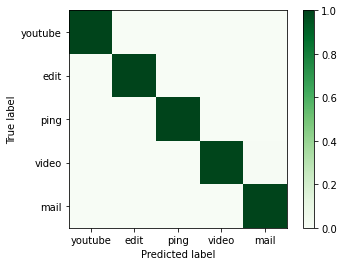

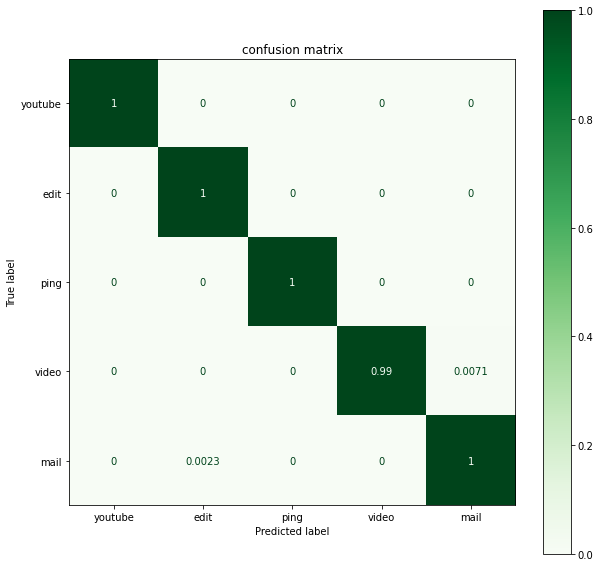

In [ ]:
#ランダムフォレスト
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.ensemble import RandomForestClassifier
import time

splits = 5
skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)
score_funcs = ["accuracy","precision_macro","recall_macro","f1_macro"]

X_train = X_train.squeeze()
X_test = X_test.squeeze()

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

start = time.time() #開始時間記録

#学習
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

#f値出力
score_rf = cross_validate(model_rf, X_test, y_test, cv=skf, scoring=score_funcs, return_estimator=True)
print('f is ',score_rf["test_f1_macro"].mean())

#精度出力
score_rf = model_rf.score(X_test, y_test)
print('rf score is', score_rf)

end = time.time()  #終了時間記録
print(end-start)   #処理時間出力

#内訳(緑のやつ)
y_pred = model_rf.predict(X_test)
print(y_pred)
labels = ["youtube", "edit", "ping", "video", "mail"]
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels = labels,include_values = False ,normalize = "true", cmap = 'Greens')
fig, ax = plt.subplots(figsize = (10,10))
plt.title('confusion matrix')
disp.plot(ax=ax, cmap="Greens")

#ベルヌーイナイーブベイズ

0.012511253356933594
score is  0.6531886024423338
[1 0 0 ... 0 1 2]


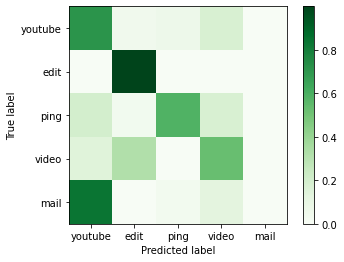

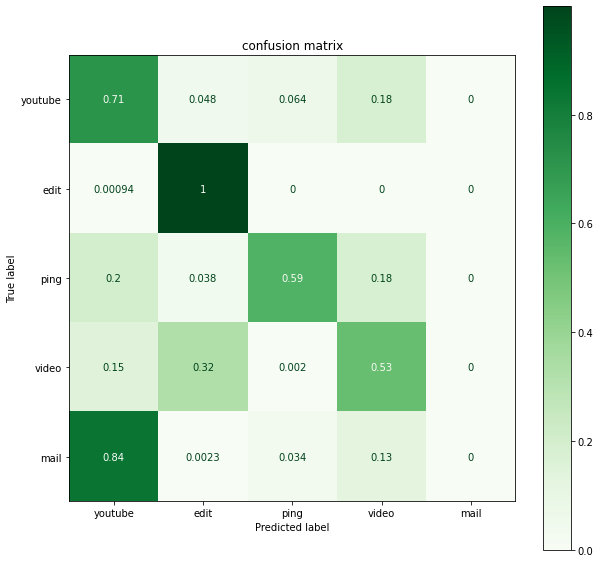

In [ ]:
#ベルヌーイナイーブベイズ
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_validate, StratifiedKFold
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from sklearn.naive_bayes import BernoulliNB
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train = X_train.squeeze()
X_test = X_test.squeeze()

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

start = time.time()#開始時間記録
#学習
BNB_model = BernoulliNB(alpha=1.0,binarize=0.0,fit_prior=True,class_prior=None)
BNB_model.fit(X_train,y_train)

end = time.time()#終了時間記録
print(end-start)

#精度出力
score_BNB = BNB_model.score(X_test,y_test)
print('score is ',score_BNB)



"""
#学習曲線
plot_learning_curves(X_train, y_train, X_test, y_test, BNB_model)
plt.show()
"""

#内訳(緑のやつ)
y_pred_BNB = BNB_model.predict(X_test)
print(y_pred_BNB)
labels = ["youtube", "edit", "ping", "video", "mail"]
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_BNB, display_labels = labels,include_values = False ,normalize = "true", cmap = 'Greens')
fig, ax = plt.subplots(figsize = (10,10))
plt.title('confusion matrix')
disp.plot(ax=ax, cmap="Greens")